In [ ]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from pprint import pprint
import datetime

In [ ]:
# Import API key
#Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy
# Output File (CSV)
output_data_file = "C:/Users/edenh/OneDrive/Desktop/python-api-challenge/WeatherPy/cities.csv"

API_KEY = "dd6514b19742a5cd173b8f99de015cce"

In [1]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    country_code = city.country_code
    
# If the city is unique, then add it to a our cities list & also add its corresponding country code
    if city_name not in cities:
        cities.append(city_name)
        country_codes.append(country_code)

# Print the city count to confirm sufficient count
print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))

The above script has generated 619 different cities using random numbers.


In [3]:
#create a dataframe to store all the cities and countries generated with citipy
df_countries = pd.DataFrame({'City': cities, 'Country': country_codes})

#add additional blank columns to store information from openweathermap api
df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''
df_countries['Date'] = ''

# keeps count of those cities whose weather information is successfully obtained
city_count = 0

# initializing # of variables
api_call_count = 1 # count for API calls made to OpenWeatherAPI, max 60 counts allowed for free API calls
sets = 0 # counter to count the number of call sets
t0 = time.time() # get current time

#loop through all rows and fill in values for blank columns in dataframe
for index,row in df_countries.iterrows():
    city_name = row['City']
    country_id = row['Country']
    
    # create a dictionary to contain the query parameters
    search_parameters = {
        "q": str(city_name)+","+str(country_id),
        "units": "IMPERIAL",
        "mode": "json",
        "APPID": API_KEY
    }

    
    # URL for Weather map api call for cities
    target_url = "http://api.openweathermap.org/data/2.5/weather"
    country_info = requests.get(target_url, params = search_parameters).json()
    
    try:
        df_countries.loc[index,'Latitude'] = country_info['coord']['lat']
        df_countries.loc[index,'Longitude'] = country_info['coord']['lon']
        df_countries.loc[index,'Temperature (F)'] = country_info['main']['temp']
        df_countries.loc[index,'Humidity (%)'] = country_info['main']['humidity']
        df_countries.loc[index,'Cloudiness (%)'] = country_info['clouds']['all']
        df_countries.loc[index,'Wind Speed (mph)'] = country_info['wind']['speed']
        df_countries.loc[index, 'Date'] = country_info['dt']
 

       
        #print log for each city
        print(f'Processing Record {api_call_count} of Set {sets} | {city_name}' )
        
        city_count = city_count + 1 
    except KeyError:
        df_countries.loc[index,'Latitude'] = np.nan
        df_countries.loc[index,'Longitude'] = np.nan
        df_countries.loc[index,'Temperature (F)'] = np.nan
        df_countries.loc[index,'Humidity (%)'] = np.nan
        df_countries.loc[index,'Cloudiness (%)'] = np.nan
        df_countries.loc[index,'Wind Speed (mph)'] = np.nan
        df_countries.loc[index,'Date'] = np.nan
        print(f"Missing weather information for city named: {city_name} ...hence skipping")
    api_call_count = api_call_count + 1        
    if api_call_count == 51: #The OpenWeatherMap API limit is 60 calls/min
        t1 = time.time()
        api_call_count = 1 # reset it for next 50 calls
        sets = sets+1
        time.sleep(60-(t0-t1))
        t0 = time.time()
print(f"Processing successfully completed. Retrieved weather information for {city_count} cities")

Missing weather information for city named: illoqqortoormiut ...hence skipping
Processing Record 2 of Set 0 | pevek
Processing Record 3 of Set 0 | luderitz
Missing weather information for city named: asau ...hence skipping
Processing Record 5 of Set 0 | longyearbyen
Processing Record 6 of Set 0 | ayagoz
Processing Record 7 of Set 0 | ribeira grande
Processing Record 8 of Set 0 | albany
Processing Record 9 of Set 0 | butaritari
Processing Record 10 of Set 0 | berlevag
Processing Record 11 of Set 0 | saldanha
Processing Record 12 of Set 0 | chuy
Processing Record 13 of Set 0 | tuktoyaktuk
Processing Record 14 of Set 0 | mitsamiouli
Processing Record 15 of Set 0 | liuzhou
Missing weather information for city named: mataura ...hence skipping
Processing Record 17 of Set 0 | yangjiang
Processing Record 18 of Set 0 | east london
Processing Record 19 of Set 0 | lompoc
Processing Record 20 of Set 0 | port alfred
Missing weather information for city named: tumannyy ...hence skipping
Processing R

Processing Record 32 of Set 3 | taybad
Processing Record 33 of Set 3 | nishihara
Processing Record 34 of Set 3 | fortuna
Missing weather information for city named: codrington ...hence skipping
Missing weather information for city named: dolbeau ...hence skipping
Processing Record 37 of Set 3 | gladstone
Processing Record 38 of Set 3 | ghanzi
Processing Record 39 of Set 3 | dunedin
Processing Record 40 of Set 3 | cabras
Processing Record 41 of Set 3 | yar-sale
Processing Record 42 of Set 3 | leningradskiy
Processing Record 43 of Set 3 | srednekolymsk
Processing Record 44 of Set 3 | vestmannaeyjar
Processing Record 45 of Set 3 | namibe
Processing Record 46 of Set 3 | burnie
Processing Record 47 of Set 3 | point pleasant
Processing Record 48 of Set 3 | gainesville
Processing Record 49 of Set 3 | aklavik
Processing Record 50 of Set 3 | margate
Processing Record 1 of Set 4 | punta arenas
Processing Record 2 of Set 4 | teya
Processing Record 3 of Set 4 | talara
Processing Record 4 of Set 4 

Processing Record 17 of Set 7 | dakar
Processing Record 18 of Set 7 | jalu
Processing Record 19 of Set 7 | ubinskoye
Missing weather information for city named: faya ...hence skipping
Processing Record 21 of Set 7 | kasongo-lunda
Processing Record 22 of Set 7 | wagar
Processing Record 23 of Set 7 | mujiayingzi
Processing Record 24 of Set 7 | mount isa
Processing Record 25 of Set 7 | abu kamal
Processing Record 26 of Set 7 | micheweni
Processing Record 27 of Set 7 | tarauaca
Processing Record 28 of Set 7 | cockburn town
Processing Record 29 of Set 7 | koumac
Processing Record 30 of Set 7 | markova
Processing Record 31 of Set 7 | semirom
Missing weather information for city named: vila ...hence skipping
Processing Record 33 of Set 7 | namie
Processing Record 34 of Set 7 | harper
Processing Record 35 of Set 7 | tiebissou
Missing weather information for city named: khani ...hence skipping
Processing Record 37 of Set 7 | araouane
Processing Record 38 of Set 7 | ducheng
Processing Record 39 

Processing Record 48 of Set 10 | acapulco
Processing Record 49 of Set 10 | kulhudhuffushi
Processing Record 50 of Set 10 | yugorsk
Processing Record 1 of Set 11 | orchard homes
Processing Record 2 of Set 11 | vaitape
Processing Record 3 of Set 11 | tautira
Missing weather information for city named: akyab ...hence skipping
Processing Record 5 of Set 11 | poum
Processing Record 6 of Set 11 | ihosy
Processing Record 7 of Set 11 | joshimath
Processing Record 8 of Set 11 | dosso
Missing weather information for city named: saleaula ...hence skipping
Processing Record 10 of Set 11 | rusape
Processing Record 11 of Set 11 | banda aceh
Processing Record 12 of Set 11 | hobyo
Processing Record 13 of Set 11 | murray bridge
Processing Record 14 of Set 11 | adrar
Processing Record 15 of Set 11 | la rioja
Processing Record 16 of Set 11 | baoding
Processing Record 17 of Set 11 | la asuncion
Processing Record 18 of Set 11 | cristalina
Processing Record 19 of Set 11 | bilibino
Processing Record 20 of Se

In [4]:
#change all data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

#display dataframe df_countries after openweathermap api calls removing those with NaNs elements
df_countries = df_countries.dropna()

# Reorder columns as we're interested in for the final DataFrame
df_countries = df_countries[["City", "Cloudiness (%)", "Country", "Date", "Humidity (%)","Latitude","Longitude",

                       "Temperature (F)", "Wind Speed (mph)"]]

print(df_countries.count()) # displays the count of rows
print(df_countries.head(20)) # displays first 20 records
df_countries.dtypes # displays the Dataype of dataframe
df_countries.to_csv(output_data_file, encoding="utf-8", index=False)

City                536
Cloudiness (%)      536
Country             536
Date                536
Humidity (%)        536
Latitude            536
Longitude           536
Temperature (F)     536
Wind Speed (mph)    536
dtype: int64
              City  Cloudiness (%) Country        Date  Humidity (%)  \
1            pevek            18.0      ru  1574641638          86.0   
2         luderitz             0.0      na  1574641639          73.0   
4     longyearbyen            75.0      sj  1574641639          78.0   
5           ayagoz           100.0      kz  1574641639          83.0   
6   ribeira grande            99.0      pt  1574641639          92.0   
7           albany            90.0      au  1574641639          67.0   
8       butaritari            90.0      ki  1574641639          74.0   
9         berlevag            97.0      no  1574641639          76.0   
10        saldanha            56.0      za  1574641640          82.0   
11            chuy             0.0      uy  1574641

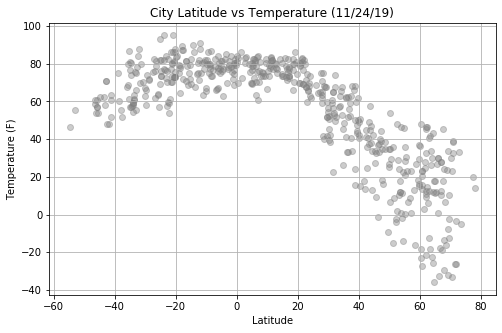

In [20]:
# Latitude vs Temperature Plot
plt.figure(figsize=(8,5))
plt.scatter(df_countries["Latitude"], df_countries["Temperature (F)"], color='gray', alpha=0.4)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'City Latitude vs Temperature ({datetime.datetime.now().strftime("%D")})')
plt.savefig("C:/Users/edenh/OneDrive/Desktop/python-api-challenge/WeatherPy/LatVsTemp.png")
plt.show()

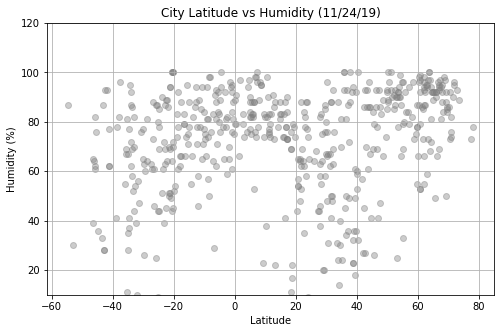

In [21]:
#  Latitude vs. Humidity Plot
plt.figure(figsize=(8,5))
plt.scatter(df_countries["Latitude"], df_countries["Humidity (%)"], color='gray', alpha=0.4)
plt.ylim(10,120)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.datetime.now().strftime("%D")})')
plt.savefig("C:/Users/edenh/OneDrive/Desktop/python-api-challenge/WeatherPy/LatVsHumidity.png")
plt.show()

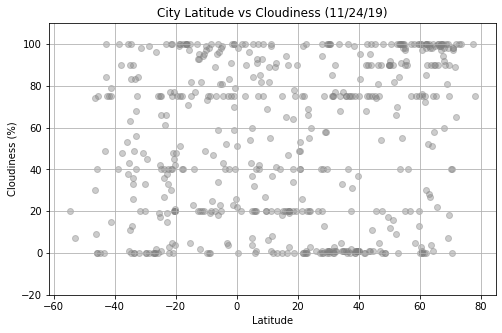

In [22]:
#  Latitude vs. Cloudiness Plot
plt.figure(figsize=(8,5))
plt.scatter(df_countries["Latitude"], df_countries["Cloudiness (%)"], color='gray', alpha=0.4)
plt.grid()
plt.ylim(-20,(df_countries["Cloudiness (%)"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.datetime.now().strftime("%D")})')
plt.savefig("C:/Users/edenh/OneDrive/Desktop/python-api-challenge/WeatherPy/LatVsCloudiness.png")
plt.show()

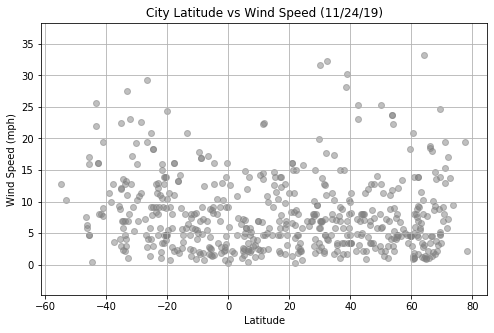

In [16]:
#  Latitude vs. Wind Speed Plot
plt.figure(figsize=(8,5))
plt.scatter(df_countries["Latitude"], df_countries["Wind Speed (mph)"], color='gray', alpha=0.4)
plt.grid()
plt.ylim((df_countries["Wind Speed (mph)"].min()-5),(df_countries["Wind Speed (mph)"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.datetime.now().strftime("%D")})')
plt.savefig("C:/Users/edenh/OneDrive/Desktop/python-api-challenge/WeatherPy/LatVsWind.png")
plt.show()